In [1]:
import numpy as np

# plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# data manager and analysis
import vodex as vx
import numan as nu

# writing files
import tifffile as tif

# Define experiment: 

In [2]:
blank = vx.Condition(vx.Stimulus('blank','blank'))
dot2 = vx.Condition(vx.Stimulus('2dot','2dot'))
dot3 = vx.Condition(vx.Stimulus('3dot','3dot'))
dot5 = vx.Condition(vx.Stimulus('5dot','5dot'))

spec = {}
spec['conditions'] = [blank,dot3,blank,dot2,blank,dot5,blank,dot2,blank,dot3,blank,
                    dot2,blank,dot5,blank,dot3,blank,dot5]
spec['timing'] = np.array([7,1,5,1,6,1,6,1,9,1,5,1,9,1,6,1,9,1])*52 # in frames
spec['project_dir'] = "E:/Peter/numan/20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1/"
spec['frames_per_volume'] = 52

experiment = vx.Experiment.from_dic(spec)
experiment.summary()

Total of 8 files.
Check the order :
[ 0 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0.ome.tif : 8910 frames
[ 1 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_1.ome.tif : 8909 frames
[ 2 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_2.ome.tif : 8909 frames
[ 3 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_3.ome.tif : 8909 frames
[ 4 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_4.ome.tif : 8909 frames
[ 5 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_5.ome.tif : 8909 frames
[ 6 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_6.ome.tif : 8909 frames
[ 7 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_7.ome.tif : 4092 frames

Cycle length: 3692
Condition ['blank']: for 364 frames
Condition ['3dot']: for 52 frames
Condition ['blank']: for 260 frames
Condition ['2dot']: for 52 frames
Condition ['blank']: for 312 frames
Condition ['5dot']: for 52 frames
Condition ['blank']: for 312 fra

# Create dff movie

In [ ]:
save_dir = 'E:/Peter/numan/dff/'
batch_size = 25 # in volumes
window_size = 15 # in volumes
nu.Preprocess(experiment).batch_dff(save_dir,batch_size, window_size, verbose=True )

### Now set the dff as data : 

In [3]:
spec['project_dir'] = 'E:/Peter/numan/dff/'
experiment = vx.Experiment.from_dic(spec)
experiment.summary()

Total of 115 files.
Check the order :
[ 0 ] dff_movie_0000.tif : 936 frames
[ 1 ] dff_movie_0001.tif : 572 frames
[ 2 ] dff_movie_0002.tif : 572 frames
[ 3 ] dff_movie_0003.tif : 572 frames
[ 4 ] dff_movie_0004.tif : 572 frames
[ 5 ] dff_movie_0005.tif : 572 frames
[ 6 ] dff_movie_0006.tif : 572 frames
[ 7 ] dff_movie_0007.tif : 572 frames
[ 8 ] dff_movie_0008.tif : 572 frames
[ 9 ] dff_movie_0009.tif : 572 frames
[ 10 ] dff_movie_0010.tif : 572 frames
[ 11 ] dff_movie_0011.tif : 572 frames
[ 12 ] dff_movie_0012.tif : 572 frames
[ 13 ] dff_movie_0013.tif : 572 frames
[ 14 ] dff_movie_0014.tif : 572 frames
[ 15 ] dff_movie_0015.tif : 572 frames
[ 16 ] dff_movie_0016.tif : 572 frames
[ 17 ] dff_movie_0017.tif : 572 frames
[ 18 ] dff_movie_0018.tif : 572 frames
[ 19 ] dff_movie_0019.tif : 572 frames
[ 20 ] dff_movie_0020.tif : 572 frames
[ 21 ] dff_movie_0021.tif : 572 frames
[ 22 ] dff_movie_0022.tif : 572 frames
[ 23 ] dff_movie_0023.tif : 572 frames
[ 24 ] dff_movie_0024.tif : 572 fram

# Create T-Score Image

## get the volumes corresponding to different conditions
If you can't fit them all at once, do by pair, or even in chunks ( not implemented yet, but will be ) 

In [4]:
def merge_idx(idx_list):
    return np.sort(np.concatenate(idx_list))

# indeces of the volumes to load
dot2_idx = experiment.select_volumes(dot2)
dot3_idx = experiment.select_volumes(dot3)
dot5_idx = experiment.select_volumes(dot5)
blank_idx = merge_idx([(dot2_idx-1), (dot3_idx-1), (dot5_idx-1)])


print(f"We found:\n", 
      f"{dot2_idx.shape} volumes with 2dot")
print(f" {dot3_idx.shape} volumes with 3dot")
print(f" {dot5_idx.shape} volumes with 5dot")
print(f" {blank_idx.shape} volumes with blank")

We found:
 (54,) volumes with 2dot
 (54,) volumes with 3dot
 (54,) volumes with 5dot
 (162,) volumes with blank


In [5]:
# load the volumes 
dot2_volumes = experiment.volume_manager.load_volumes(dot2_idx, verbose = False)
dot3_volumes = experiment.volume_manager.load_volumes(dot3_idx, verbose = False)
dot5_volumes = experiment.volume_manager.load_volumes(dot5_idx, verbose = False)
blank_volumes = experiment.volume_manager.load_volumes(blank_idx, verbose = False)
dot2_volumes.shape

100%|██████████| 8424/8424 [00:10<00:00, 836.72it/s] 


(54, 52, 468, 500)

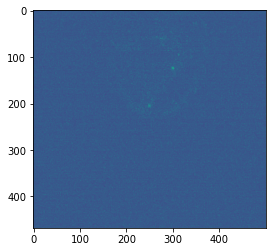

In [6]:
# check a random slice of a volume, make sure it looks as expected ... 
plt.imshow(dot2_volumes[5,10,:,:])

## calculate and write t-score and diff images 

### 1. 5 dot vs 2 dot 

In [8]:
# multiply difference image and t-score image by this constants before turning into integer and writing... 
T_SCALE = 1000
DIFF_SCALE = 100 

t_img = nu.get_t_score(dot2_volumes, dot5_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(dot2_volumes, dot5_volumes, absolute = True)*DIFF_SCALE

tif.imsave('E:/Peter/numan/processed/ok08_two_vs_five_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('E:/Peter/numan/processed/ok08_two_vs_five_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 1143.2918723918642, diff image : 19562.962962962964


C:\Users\luup\AppData\Local\Temp\ipykernel_8896\99653016.py:8: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_two_vs_five_t_score.tif',
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\99653016.py:10: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_two_vs_five_diff.tif',


### 2. 5 dot vs 3 dot 

In [9]:
# multiply difference image and t-score image by this constants before turning into integer and writing... 
T_SCALE = 1000
DIFF_SCALE = 100 

t_img = nu.get_t_score(dot3_volumes, dot5_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(dot3_volumes, dot5_volumes, absolute = True)*DIFF_SCALE

tif.imsave('E:/Peter/numan/processed/ok08_three_vs_five_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('E:/Peter/numan/processed/ok08_three_vs_five_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 1092.9853999183622, diff image : 4100.0


C:\Users\luup\AppData\Local\Temp\ipykernel_8896\864869645.py:8: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_three_vs_five_t_score.tif',
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\864869645.py:10: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_three_vs_five_diff.tif',


### 3. 3 dot vs 2 dot 

In [10]:
# multiply difference image and t-score image by this constants before turning into integer and writing... 
T_SCALE = 1000
DIFF_SCALE = 100 

t_img = nu.get_t_score(dot2_volumes, dot3_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(dot2_volumes, dot3_volumes, absolute = True)*DIFF_SCALE

tif.imsave('E:/Peter/numan/processed/ok08_two_vs_three_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('E:/Peter/numan/processed/ok08_two_vs_three_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 1187.2951663435374, diff image : 19551.851851851854


C:\Users\luup\AppData\Local\Temp\ipykernel_8896\1903526863.py:8: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_two_vs_three_t_score.tif',
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\1903526863.py:10: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_two_vs_three_diff.tif',


### 2. 5 dot vs all blank

In [11]:
t_img = nu.get_t_score(blank_volumes, dot5_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(blank_volumes, dot5_volumes, absolute = True)*DIFF_SCALE

tif.imsave('E:/Peter/numan/processed/ok08_dotfive_vs_all_blank_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('E:/Peter/numan/processed/ok08_dotfive_vs_all_blank_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 937.5331996658667, diff image : 3750.617283950618


C:\Users\luup\AppData\Local\Temp\ipykernel_8896\3584013264.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_dot5_vs_all_blank_t_score.tif',
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\3584013264.py:6: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_dot5_vs_all_blank_diff.tif',


### 2. 3 dot vs all blank

In [13]:
t_img = nu.get_t_score(blank_volumes, dot3_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(blank_volumes, dot3_volumes, absolute = True)*DIFF_SCALE

tif.imsave('E:/Peter/numan/processed/ok08_dotthree_vs_all_blank_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('E:/Peter/numan/processed/ok08_dotthree_vs_all_blank_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 885.1137515447447, diff image : 3948.7654320987654


C:\Users\luup\AppData\Local\Temp\ipykernel_8896\1389367232.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_dot3_vs_all_blank_t_score.tif',
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\1389367232.py:6: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_dot3_vs_all_blank_diff.tif',


### 3. 2 dot vs all blank

In [14]:
t_img = nu.get_t_score(dot2_volumes, blank_volumes, absolute = True)*T_SCALE
diff = nu.get_diff(dot2_volumes, blank_volumes, absolute = True)*DIFF_SCALE

tif.imsave('E:/Peter/numan/processed/ok08_dottwo_vs_all_blank_t_score.tif',
           t_img.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
tif.imsave('E:/Peter/numan/processed/ok08_dottwo_vs_all_blank_diff.tif',
           diff.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

max t-image value : 1288.5535135627297, diff image : 19935.802469135804


C:\Users\luup\AppData\Local\Temp\ipykernel_8896\128380737.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_dot2_vs_all_blank_t_score.tif',
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\128380737.py:6: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave('E:/Peter/numan/processed/ok08_dot2_vs_all_blank_diff.tif',


### 4. random shuffle of blanks 
You need to enter the number of blanks in the experiment and the number of stimulus ( can be any of the : number of 2 dots or 3 dots or 5 dots ... ) 

In [15]:
np.random.seed(42)
# INPUT NEEDED _______________________
# enter the number of blanks and stims: 
n_blanks = 162
n_stim = 54
# ____________________________________

split_memory = {}
for isplit in [1,2,3,4,5]:
    
    random60 = np.random.choice(n_blanks, size=n_stim*2, replace=False)
    blank_group1 = random60[0:n_stim]
    blank_group2 = random60[n_stim:n_stim*2]

    t_img = nu.get_t_score(blank_volumes[blank_group1,:,:,:], blank_volumes[blank_group2,:,:,:])*T_SCALE
    diff = nu.get_diff(blank_volumes[blank_group1,:,:,:], blank_volumes[blank_group2,:,:,:])*DIFF_SCALE

    tif.imsave(f'E:/Peter/numan/processed/ok08_blank_vs_blank_random_split{isplit}_t_score.tif',t_img.astype(np.uint16),
               shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
    tif.imsave(f'E:/Peter/numan/processed/ok08_blank_vs_blank_random_split{isplit}_t_score.tif',t_img.astype(np.uint16),
               shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)
    
    print(f'max t-image value : {t_img.max()}, diff image : {diff.max()}')

    split_memory[f'split{isplit} group1'] = blank_group1
    split_memory[f'split{isplit} group2'] = blank_group2
    

C:\Users\luup\AppData\Local\Temp\ipykernel_8896\2878489171.py:13: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave(f'E:/Peter/numan/processed/ok08_blank_vs_blank_random_split{isplit}_t_score.tif',t_img.astype(np.uint16),
C:\Users\luup\AppData\Local\Temp\ipykernel_8896\2878489171.py:15: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave(f'E:/Peter/numan/processed/ok08_blank_vs_blank_random_split{isplit}_t_score.tif',t_img.astype(np.uint16),


max t-image value : 1470.8737559521833, diff image : 6140.000000000001
max t-image value : 1684.8496610792797, diff image : 8183.333333333334
max t-image value : 1485.4393572630634, diff image : 7203.333333333333
max t-image value : 1562.941376616057, diff image : 5553.333333333334
max t-image value : 1528.5983711165838, diff image : 7180.000000000001


In [16]:
import pandas as pd
split_df = pd.DataFrame.from_dict(split_memory)
split_df.to_csv('E:/Peter/numan/processed/ok08_blank_split_info.csv',index=False)